In [7]:
%cd ..

/home/ead/iking5/code/StreamLP


'/home/ead/iking5/code/StreamLP'

In [42]:
import torch 
ei_ts = torch.load('mixer-datasets/precalculated/wikipedia_ei.pt')
ei = ei_ts['ei']; ts = ei_ts['ts']

x = torch.load('mixer-datasets/precalculated/wikipedia_x.pt')
x_tr = x['tr']; x_te = x['te']

In [63]:
from torch_geometric.nn import MessagePassing as MP

def fn(x): 
    x[x==0] = 0.5
    #x += 0.5
    return x

ei = ei[:,:ei.size(1)//2]
act = fn 

mp = MP(aggr='mean')
p1 = act(x_tr + mp.propagate(ei, x=x_tr))
p2 = act(p1 + mp.propagate(ei, x=p1))
p3 = act(p2 + mp.propagate(ei, x=p2))
p4 = act(p3 + mp.propagate(ei, x=p3))

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


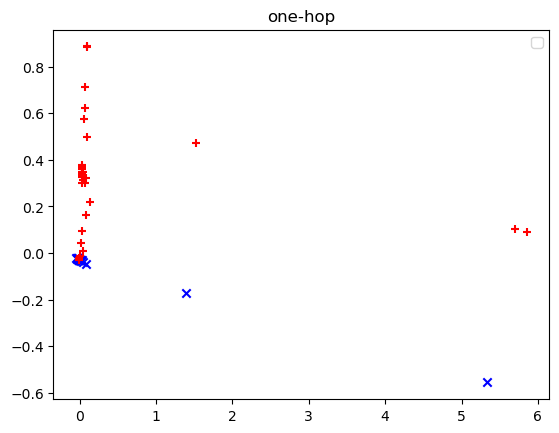

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


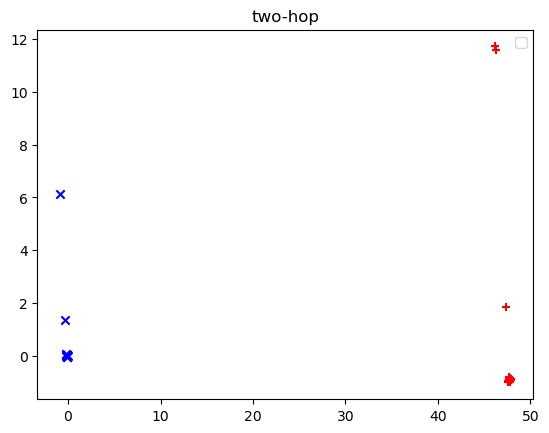

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


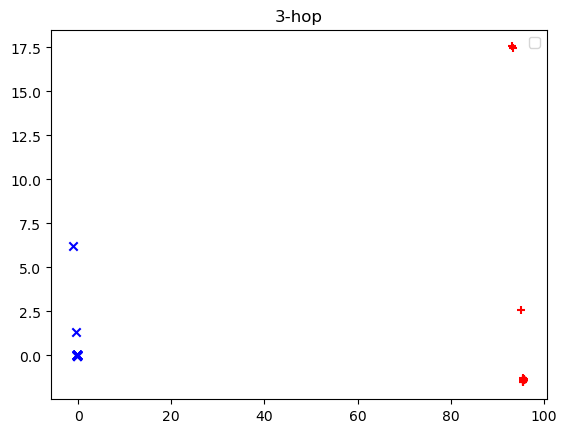

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


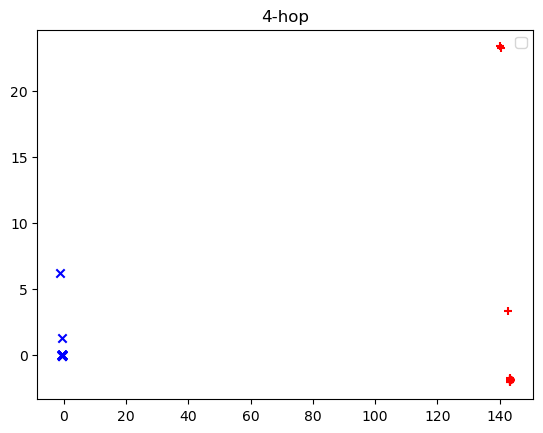

In [64]:
from sklearn.decomposition import PCA 
import matplotlib.pyplot as plt

def plot(x, title=''):
    x_pca = PCA(n_components=2).fit_transform(x)
    users = ei[0].unique()
    items = ei[1].unique()

    plt.scatter(x_pca[users, 0], x_pca[users, 1], c='blue', marker='x')
    plt.scatter(x_pca[items, 0], x_pca[items, 1], c='red', marker='+')
    plt.legend()
    plt.title(title)
    plt.show()

plot(p1, 'one-hop'); plot(p2, 'two-hop')
plot(p3, '3-hop'); plot(p4, '4-hop')

In [70]:
ei, ef, et, y = torch.load('mixer-datasets/precalculated/tgbase/raw/wikipedia.pt')
ei[:,1] += ei.max()

tensor([[   0, 8226],
        [   1, 8227],
        [   1, 8227],
        ...,
        [2399, 8721],
        [7479, 9146],
        [2399, 8721]])